# Classification of Emotion in Audio Files
This is a personal project to explore the possibilty of classifying emotion in audio files

## The Dataset: RAVDESS
The dataset that will be used is the Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS). Only the audio files will be used in the analysis. 

[Link To Dataset](https://zenodo.org/record/1188976)

This portion of the RAVDESS contains 1440 files: 60 trials per actor x 24 actors = 1440. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

__File Identifiers__
* Modality (01 = full-AV, 02 = video-only, 03 = audio-only)
* Vocal channel (01 = speech, 02 = song)
* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised)
* Emotional intensity (01 = normal, 02 = strong)
    * NOTE: There is no strong intensity for the 'neutral' emotion
* Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door")
* Repetition (01 = 1st repetition, 02 = 2nd repetition)
* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female)

## Plan for Analysis
1. Exploratory Data Analysis
    * Explore the distribution of different identifiers in the audio files
    * Explore spectograms of different emotions
2. Identify Potential Models

Potential models for image classification will be examined such as the following:

| Potential Model | Quick Description |
| --- | --- |
| SVM | Support Vector Machines build a hyper-plane or a set of hyper-planes in a high dimensional space and good separation between the two classes is achieved. |
| Decision Tree | Decision trees are based on a hierarchical rule-based method and permits the acceptance and rejection of class labels at each intermediary stage/level. |
| KNN | The k-nearest neighbor relies on the distance between feature vectors and classifies unknown data points by finding the most common class among the k-closest examples. |
| CNN | Convolutional neural networks (CNN) is a special architecture of artificial neural networks. It is composed of of two simple elements: convolutional layers and pooling layers. |

3. Data Cleaning and Preparation 
    * The data will be prepared by converting the audio files to spectograms and saved as greyscale images
    * These images will be cleaned by only viewing the data between 1 and 2.5 seconds, the time in which the sentences were said
    * It is important that images are the same size
    * Then split into  train and test sets
4. Model Creation
5. Model Analysis
    * Models will be analyzed based on their accuracy, precision, and recall

In [15]:
# Libraries that will be used
import os
# Visualizations for EDA
import seaborn as sns
# Creation of Dataset
import pandas as pd 
# Visualizing and creating spectograms
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
%matplotlib inline
# Creation of Test Train Sets
from sklearn.model_selection import train_test_split
# 
import create_df
import create_image_dataset

## Exploratory Data Analysis
Two Steps:
1. Creation of attributes dataframe

In [2]:
# Create attributes dataframe
audiofile_attributes = create_df.create_df()
audiofile_attributes.head()

,file_name,Modality,Voice_channel,Emotion,Intensity,Statement,Repetition,Actor,Gender
0,03-01-01-01-01-01-01.wav,3,1,1,1,1,1,1,1
1,03-01-01-01-01-01-02.wav,3,1,1,1,1,1,2,2
2,03-01-01-01-01-01-03.wav,3,1,1,1,1,1,3,1
3,03-01-01-01-01-01-04.wav,3,1,1,1,1,1,4,2
4,03-01-01-01-01-01-05.wav,3,1,1,1,1,1,5,1


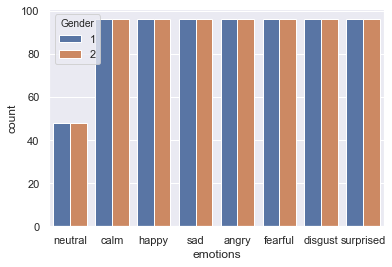

In [3]:
# Beginning of some quick visualizations
# All of my attributes are categorical, so I will just show boxplots
# These are plots for the entire dataset will be doing test train sets here soon 
sns.set(style="darkgrid")
# Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised)

emotionList = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']
for i in range(1,9):
    audiofile_attributes.loc[audiofile_attributes['Emotion'] == i, 'emotions'] = emotionList[i-1]


emotionCountByGender = sns.countplot(x=audiofile_attributes['emotions'], hue = audiofile_attributes['Gender'])
# Why the count for neutral is half: Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

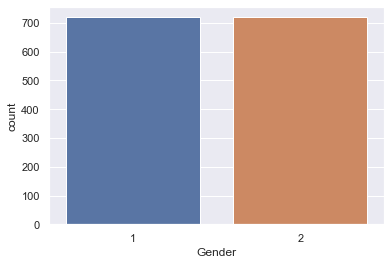

In [4]:
genderCount = sns.countplot(x=audiofile_attributes['Gender'])

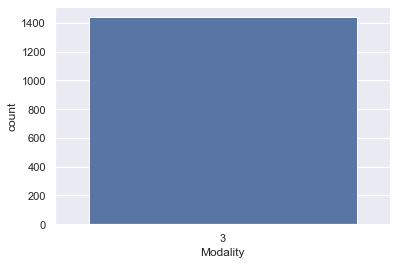

In [5]:
# Show that all are the same modality
# Modality (01 = full-AV, 02 = video-only, 03 = audio-only)
modalityCount = sns.countplot(x=audiofile_attributes['Modality'])
# All are audio-only files

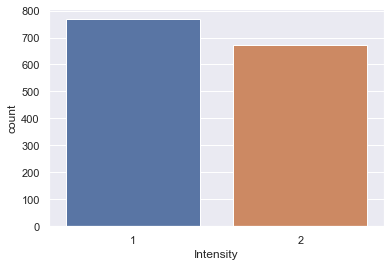

In [6]:
# Show the counts for intensity 
# Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

intensityCount = sns.countplot(x=audiofile_attributes['Intensity'])
# There are more normal intensity than strong, because neutral does not have a strong intensity

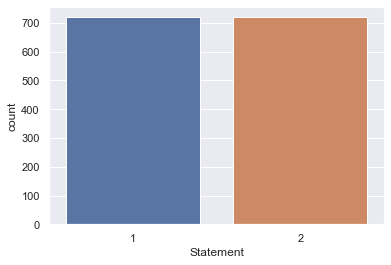

In [7]:
# Show the counts for Statements 
# Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

statementCount = sns.countplot(x=audiofile_attributes['Statement'])
# Each statement is said the same number of times

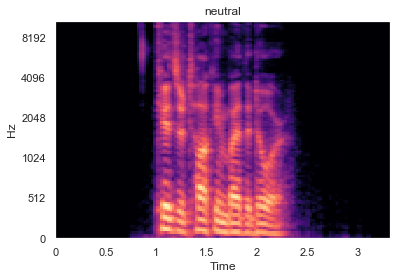

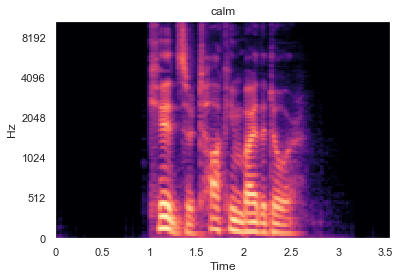

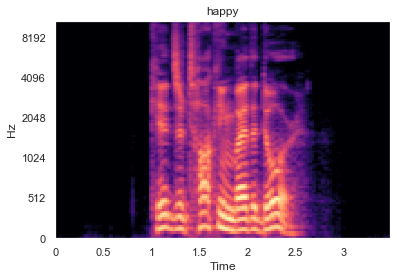

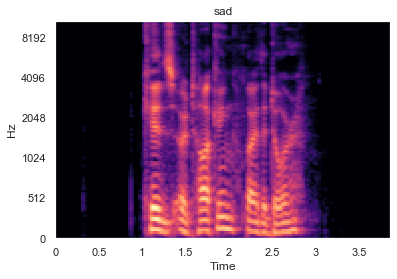

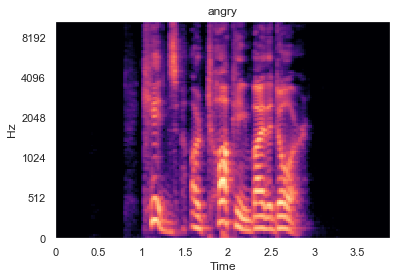

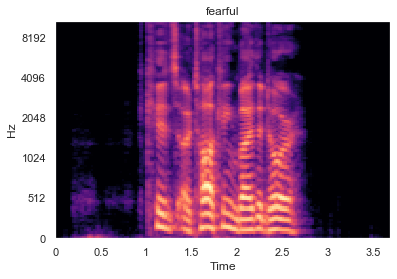

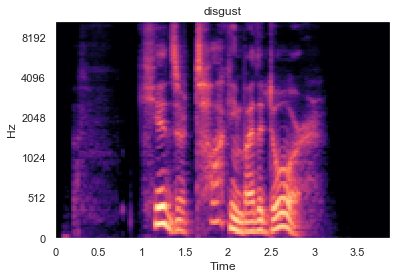

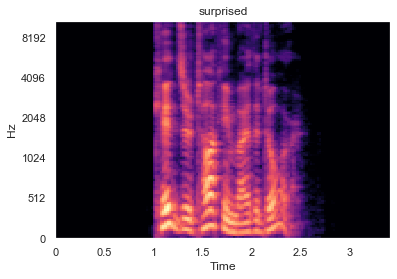

In [8]:
# Something else important to look at. The difference in emotion spectograms
# Actor: 1 Intensity: 1 
# 03-01-01-01-01-01-01.wav # change the third number for emotion
plt.figure(figsize=(6, 4))
librosa.time_to_samples(1, 2.5)
for i in range(1, 9):
    filename = "03-01-0" + str(i) + "-01-01-01-01.wav"    
    filename = "..\\ravdess-emotional-speech-audio\\" + filename
    y, sr = librosa.load(filename)
    spect = librosa.feature.melspectrogram(y=y, sr=sr)
    spect = librosa.power_to_db(spect, ref=np.max)
    librosa.display.specshow(spect, y_axis='mel', x_axis='time')
    plt.title(emotionList[i-1])
    plt.show()

# There are subtle differences between the different emotions, will a CNN pick up on these differences 

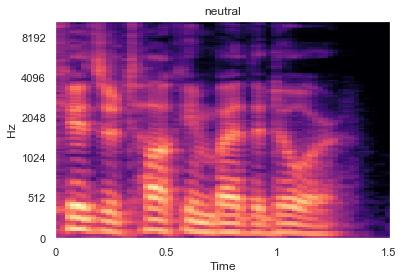

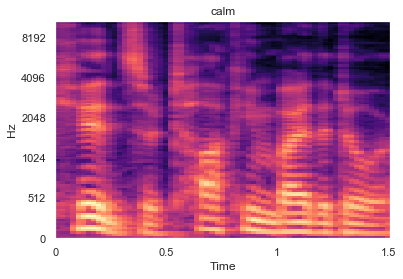

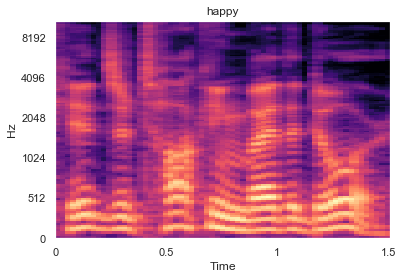

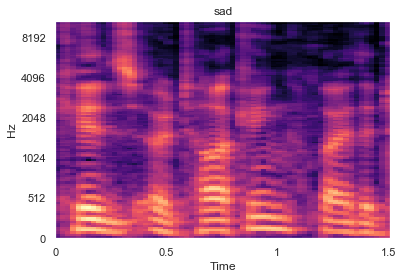

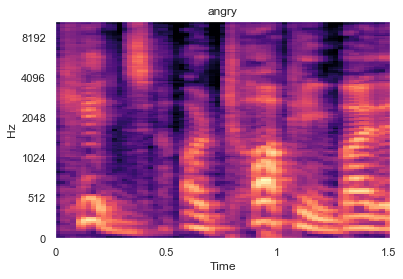

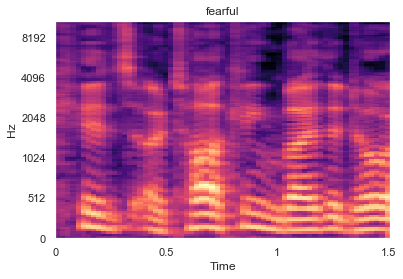

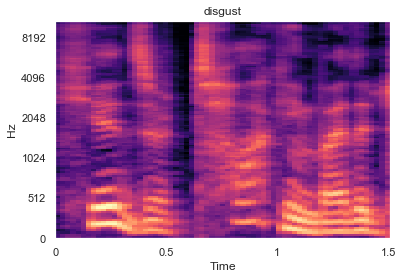

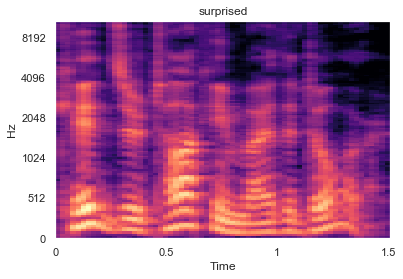

In [9]:
# Reshaping the above spectograms
# Actor: 1 Intensity: 1 
# 03-01-01-01-01-01-01.wav # change the third number for emotion

for i in range(1, 9):
    fig = plt.figure(figsize=(6, 4))
    filename = "03-01-0" + str(i) + "-01-01-01-01.wav"
    image_name = "..\\images\\" + filename.split(".")[0] 
    filename = "..\\ravdess-emotional-speech-audio\\" + filename
    y, sr = librosa.load(filename)
    begin = librosa.time_to_samples(1)
    mid = librosa.time_to_samples(2.5)
    y = y[begin:mid]
    spect = librosa.feature.melspectrogram(y=y, sr=sr)
    spect = librosa.power_to_db(spect, ref=np.max)
    librosa.display.specshow(spect, y_axis='mel', x_axis='time')
    plt.title(emotionList[i-1])
    fig.savefig(image_name)

# There are subtle differences between the different emotions, will a CNN pick up on these differences 

### Summary from EDA
- All files are audio-only files -> which was already known
- All are speech audio files 
- There are more normal intensity than strong, because neutral does not have a strong intensity
- There are the same number of male voices as there are female voices
- Each statement is said the same number of times
- Visual inspection of actor 1, saying statement 1 in intensity 1 shows that there are differences between the different emotions and hopefully my models will be able to pick up on these differences 

## Data Cleaning and Preparation

In [16]:
# Creation of Test and Train Sets 

y = audiofile_attributes['Emotion']
X = audiofile_attributes['file_name']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [17]:
X_train = create_image_dataset.create_image_set(X_train)
X_test = create_image_dataset.create_image_set(X_test)

In [18]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [51]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

## Model Creation

In [52]:
print("Training set images shape: {}".format(X_train.shape))
print("Training set labels shape: {}".format(y_train.shape))
print("Test set images shape: {}".format(X_test.shape))
print("Test set labels shape: {}".format(y_test.shape))

Training set images shape: (1152, 288, 432, 2)
Training set labels shape: (1152, 8)
Test set images shape: (288, 288, 432, 2)
Test set labels shape: (288, 8)


In [53]:
from PIL import Image
X_train[1]
img = Image.fromarray(X_train[1000])
img.show()

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

epochs = 10
learning_rate = 0.001
batch_size = 128

n_input = 28
n_classes = 8

ModuleNotFoundError: No module named 'tensorflow.examples.tutorials'

## Model Analysis

## Conclusions